problem statement:
    
Do the following on titanic dataset:

1. Load the dataset into python environment 
2. Do all the necessary pre-processing steps 
3. Create kNN and SVM models 
4. Do k-fold and stratified stratified k-fold cross validation techniques and find the 
   average accuracy score of the models

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

### Load the dataset

In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\DSA\datasets\titanic_dataset.csv')

### Exploratory Data Analysis

In [3]:
#view the first few entries
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Print the number of rows and columns of the dataset
df.shape

(891, 12)

In [5]:
#statistical analysis
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
## Checking the datatypes of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
## count number of missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


The column Age, Cabin and Embarked contain missing values

In [8]:
## Number of persons survived

df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

The data indicates that less people are survived

### Data Visualisation

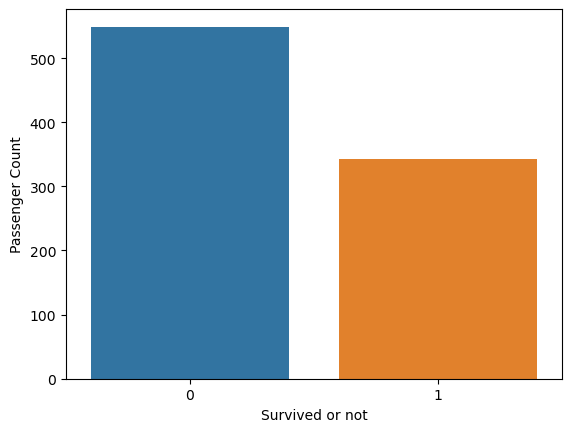

In [9]:
## count plot of number of people survived
sns.countplot(x='Survived', data=df, )
plt.xlabel('Survived or not')
plt.ylabel('Passenger Count')
plt.show()

In [10]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

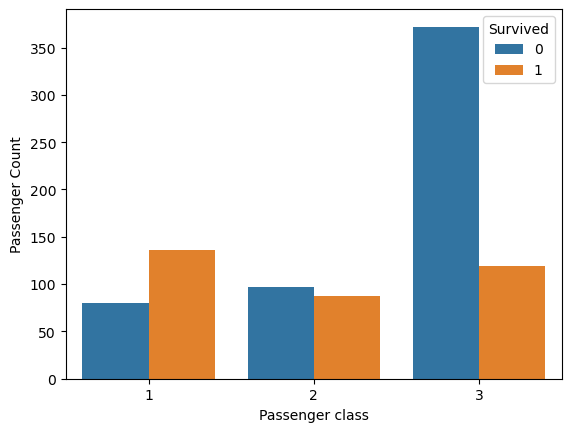

In [11]:
sns.countplot(x='Pclass', data=df,hue='Survived' )
plt.xlabel('Passenger class')
plt.ylabel('Passenger Count')
plt.show()

In [12]:
df[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


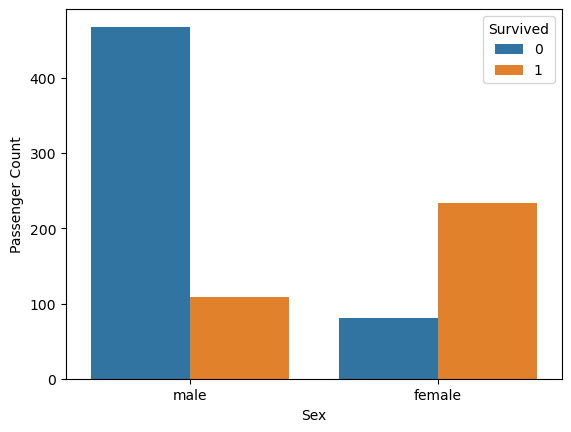

In [13]:
sns.countplot(x='Sex', data=df, hue='Survived' )
plt.xlabel('Sex')
plt.ylabel('Passenger Count')
plt.show()

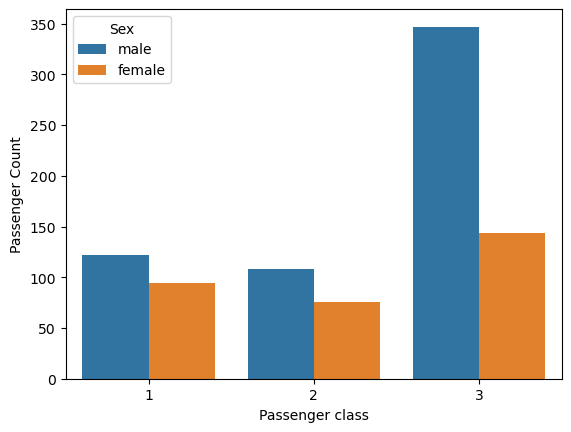

In [14]:
sns.countplot(x='Pclass', data=df,hue='Sex' )
plt.xlabel('Passenger class')
plt.ylabel('Passenger Count')
plt.show()

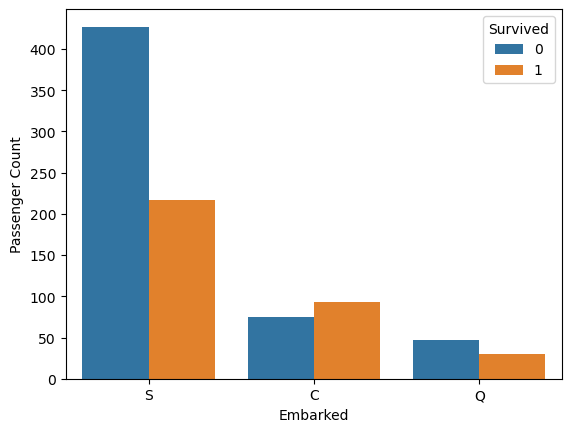

In [15]:
sns.countplot(x='Embarked', data=df, hue='Survived' )
plt.xlabel('Embarked')
plt.ylabel('Passenger Count')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14272\3237795141.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


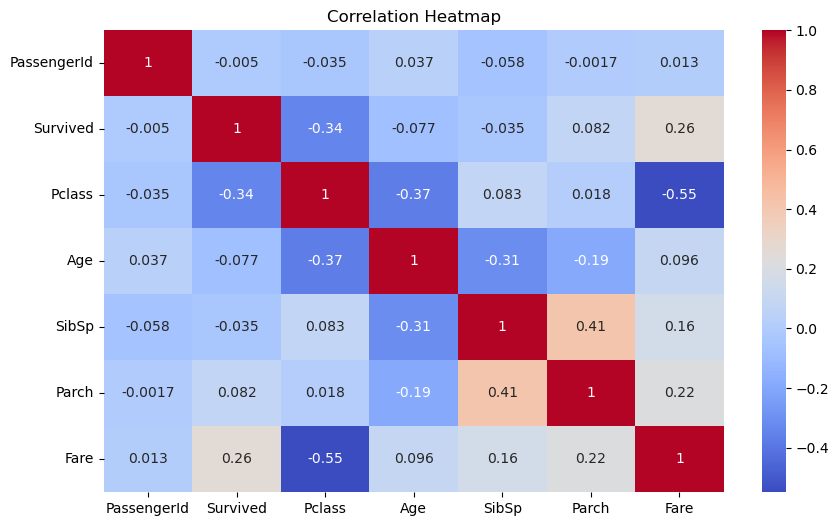

In [16]:
# Correlation heatmap

correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Data preprocessing

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


data preprocessing:
    
Survived is the target column

Age' and 'Embarked' has less number of missing value.So we can impute data on these columns.

As there are a lot of missing values in the column 'Cabin', we can remove it from the training data.

'PassengerId', 'Name' and 'Ticket' doesn't contribute to the target variable 'Survived'. So, we can remove it from the data.

In [19]:
## Make passenger id as the index column

df.set_index('PassengerId',inplace=True)

In [20]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Impute missing values in the 'Age' columnnwith the mean
data = df
data['Age'] = data['Age'].fillna(data['Age'].mean())

# Impute missing values in the 'Cabin' columnnwith the constant value
data.Cabin = data.Cabin.fillna(0)

# Impute missing values in the 'Embarked' columnnwith the 'S'
data.Embarked = data.Embarked.fillna('S')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [23]:
# Removing the columns Name, Ticket and Cabin from the data

data = data.drop(columns=['Name','Ticket', 'Cabin'])

In [24]:
## Assigning numerical values to Sex and Embarked categories

sex = {"male": 0, "female": 1} 
data['Sex'] = data['Sex'].map(sex) 
  
embarked = {"S": 1, "C": 2, "Q": 3} 
data['Embarked'] = data['Embarked'].map(embarked) 

In [25]:
#Creating dataframe for features
X = data.drop(['Survived'], axis=1) 

#Creating dataframe for target
y = data['Survived']

In [26]:
print(X.shape, y.shape)

(891, 7) (891,)


In [27]:
#Splitting the dataset into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 7) (179, 7) (712,) (179,)


### Feature Scaling

In [28]:
# Scale the input features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Building and Evaluation

Using two models for classification of fraudulent and non-fraudulent transactions:

1.SVM(Support Vector Machine)

2.KNN(K Nearest neighbors)

In [29]:
# Create SVM Classifier
svc_classifier = SVC()

# train the model using the training sets
svc_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
svc_predictions = svc_classifier.predict(X_test_scaled)

In [30]:
# evaluate the model
svc_accuracy = accuracy_score(y_test, svc_predictions)
conf_matrix = confusion_matrix(y_test, svc_predictions)
classification_rep = classification_report(y_test, svc_predictions)

print(f'Accuracy: {svc_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.82
Confusion Matrix:
[[95 10]
 [22 52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



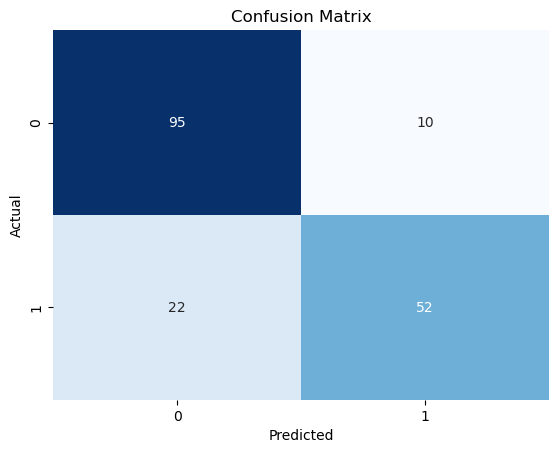

In [31]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
# Create KNN Classifier
knn_classifier = KNeighborsClassifier()

# train the model using the training sets
knn_classifier.fit(X_train_scaled, y_train)

# make predictions on the testing set
knn_predictions = knn_classifier.predict(X_test_scaled)

In [33]:
# evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
conf_matrix = confusion_matrix(y_test, knn_predictions)
classification_rep = classification_report(y_test, knn_predictions)

print(f'Accuracy: {knn_accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.80
Confusion Matrix:
[[91 14]
 [21 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



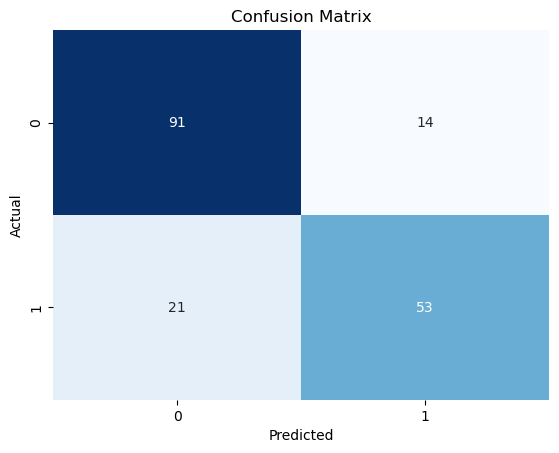

In [34]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
print(f'SVM_Accuracy: {svc_accuracy:.2f}')
print(f'KNN_Accuracy: {knn_accuracy:.2f}')

SVM_Accuracy: 0.82
KNN_Accuracy: 0.80


The model with best performance is Support vector Machine.

### Cross Validation

### K-Fold Cross validation

In [36]:
kfold_validator = KFold(10)
for train_index,test_index in kfold_validator.split(X,y):
    print('Training Index:', train_index)
    print('Testing Index:', test_index)

Training Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [37]:
## SVM 
svm_cv = cross_val_score(svc_classifier,X,y,cv = kfold_validator)

In [38]:
svm_cv

array([0.6       , 0.6741573 , 0.66292135, 0.6741573 , 0.66292135,
       0.69662921, 0.65168539, 0.74157303, 0.73033708, 0.69662921])

In [39]:
svm_cv_mean = np.mean(svm_cv)
svm_cv_mean

0.6791011235955057

In [40]:
## KNN
knn_cv = cross_val_score(knn_classifier,X,y,cv = kfold_validator)

In [41]:
knn_cv

array([0.62222222, 0.66292135, 0.69662921, 0.65168539, 0.68539326,
       0.71910112, 0.69662921, 0.70786517, 0.70786517, 0.80898876])

In [42]:
knn_cv_mean = np.mean(knn_cv)
knn_cv_mean

0.6959300873907617

In [43]:
print(f'SVM_Average_Accuracy: {svm_cv_mean}')
print(f'KNN_Average_Accuracy: {knn_cv_mean}')

SVM_Average_Accuracy: 0.6791011235955057
KNN_Average_Accuracy: 0.6959300873907617


KNN has highest accuracy in K-fold cross validation

### Stratified K-Fold cross validation

In [44]:
skfold_validator = StratifiedKFold(n_splits = 10)

In [45]:
for train_index,test_index in skfold_validator.split(X,y):
    print('Training Index:', train_index)
    print('Testing Index:', test_index)

Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [46]:
## SVM

svm_sk = cross_val_score(svc_classifier,X,y,cv = skfold_validator)

In [47]:
svm_sk

array([0.62222222, 0.57303371, 0.68539326, 0.74157303, 0.69662921,
       0.68539326, 0.68539326, 0.71910112, 0.70786517, 0.6741573 ])

In [48]:
svm_sk_mean = np.mean(svm_sk)
svm_sk_mean

0.6790761548064919

In [49]:
## KNN

knn_sk = cross_val_score(knn_classifier,X,y,cv = skfold_validator)

In [50]:
knn_sk

array([0.62222222, 0.65168539, 0.68539326, 0.68539326, 0.70786517,
       0.69662921, 0.73033708, 0.69662921, 0.68539326, 0.79775281])

In [51]:
knn_sk_mean = np.mean(knn_sk)
knn_sk_mean

0.6959300873907617

In [52]:
print(f'SVM_Average_Accuracy: {svm_sk_mean}')
print(f'KNN_Average_Accuracy: {knn_sk_mean}')

SVM_Average_Accuracy: 0.6790761548064919
KNN_Average_Accuracy: 0.6959300873907617


KNN has high accuracy in stratified K-fold Cross validation